In [3]:
#downloading json data
!gdown --id 1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT --output indian_number_plates.json

Downloading...
From: https://drive.google.com/uc?id=1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT
To: C:\Users\Appu\Desktop\number plate detetction\indian_number_plates.json

  0%|          | 0.00/92.5k [00:00<?, ?B/s]
100%|##########| 92.5k/92.5k [00:00<?, ?B/s]


In [1]:
import cv2
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading json into data frame
df_plates = pd.read_json("./indian_number_plates.json",lines=True)
df_plates.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [10]:
# creating folder to download data
import os
os.makedirs("number_plates", exist_ok=True)

In [15]:
# downloading the data and loading them into data frame
import urllib
from PIL import Image 
dataset = dict()

dataset["image_name"] = list()

dataset["top_x"] = list()

dataset["top_y"] = list()

dataset["bottom_x"] = list()

dataset["bottom_y"] = list()

dataset["class_name"] = list()

counter = 0

for index, row in df_plates.iterrows():

    img = urllib.request.urlopen(row["content"])

    img = Image.open(img)

    img = img.convert('RGB')

    img.save(f'number_plates/licensed_car_{counter}.jpeg', "JPEG")

    dataset["image_name"].append(

      f'number_plates/licensed_car_{counter}.jpeg'

    )

    data = row["annotation"]

    width = data[0]["imageWidth"]

    height = data[0]["imageHeight"]

    dataset["top_x"].append(

      int(round(data[0]["points"][0]["x"] * width))

    )

    dataset["top_y"].append(

      int(round(data[0]["points"][0]["y"] * height))

    )

    dataset["bottom_x"].append(

      int(round(data[0]["points"][1]["x"] * width))

    )

    dataset["bottom_y"].append(

      int(round(data[0]["points"][1]["y"] * height))

    )

    dataset["class_name"].append("license_plate")

    counter += 1

print("Downloaded {} car images.".format(counter))

Downloaded 237 car images.


In [16]:
df = pd.DataFrame(dataset)

In [4]:
df = pd.read_csv("./annotations_file.csv")# saving the data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# spliiting data into training data and test data
train_df,test_df=train_df, test_df = train_test_split(
  df,test_size=0.2, random_state=42)

In [7]:
train_df.to_csv('ANNOTATIONS_FILE'.lower()+".csv", index=False, header=None)

In [8]:
train_df.head()

,number_plates/licensed_car_183.jpeg,169,260,358,298,license_plate
35,number_plates/licensed_car_31.jpeg,450,277,568,356,license_plate
98,number_plates/licensed_car_23.jpeg,288,423,572,496,license_plate
104,number_plates/licensed_car_47.jpeg,397,421,598,483,license_plate
75,number_plates/licensed_car_153.jpeg,91,138,178,170,license_plate
93,number_plates/licensed_car_64.jpeg,62,132,175,190,license_plate


In [25]:
classes = set(['license_plate'])

with open('CLASSES_FILE'.lower()+".csv", 'w') as f:

  for i, line in enumerate(sorted(classes)):

    f.write('{},{}\n'.format(line,i))

In [23]:
os.makedirs("snapshots", exist_ok=True)

In [1]:
import urllib
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'

urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [5]:
import keras
from keras_retinanet import models

In [6]:
model = models.load_model("./snapshots/resnet50_csv_10.h5",backbone_name="resnet50")

In [7]:
model = models.convert_model(model)

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [8]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [3]:

from keras_retinanet import models
from  keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from  keras_retinanet.utils.visualization import draw_box, draw_caption
from  keras_retinanet.utils.colors import label_color


In [4]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [5]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

#     color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=(255,255,0))

#     caption = "{} {:.3f}".format(labels_to_names[label], score)
#     draw_caption(image, b, caption)


In [6]:
def show_detected_objects(image):
#   img_path = image_row.image_name
  
  image = read_image_bgr(image)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

#   true_box = [
#     image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
#   ]
#   draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

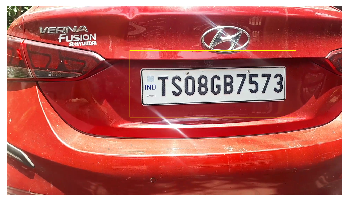

In [18]:
image = "./oo.png"
show_detected_objects(image)
